Topic: Challenge 5

Subject: Linear Splitting

Date: 1/28/18

Name: Louisa Ying

In [196]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import datetime
from sklearn.cross_validation import train_test_split

In [150]:
df = pd.read_csv('2013_movies.csv')

In [151]:
df = df.dropna()
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

In [152]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14


**Question 1:** Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?


The model predicts the mean of the response variable (in this case, the mean of domestic total gross).

In [153]:
df['ones'] = np.ones(len(df))

In [154]:
y = df['DomesticTotalGross']
X = df['ones']

In [155]:
X_1 = sm.add_constant(X)
model = sm.OLS(y, X_1)
fit = model.fit()
fit.summary()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Sun, 28 Jan 2018   Prob (F-statistic):                nan
Time:                        15:25:45   Log-Likelihood:                -1714.4
No. Observations:                  87   AIC:                             3431.
Df Residuals:                      86   BIC:                             3433.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ones        1.035e+08   9.43e+06     10.975      0.000    8.48e+07    1.22e+08
==============================================================================
Omnibus:                       47.828   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.528
Skew:                           2.032   Prob(JB):                     1.11e-26
Kurtosis:                       7.058   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
df.DomesticTotalGross.mean()

103515275.64367816

In [157]:
pred = fit.predict(X)

Text(0,0.5,'Actual')

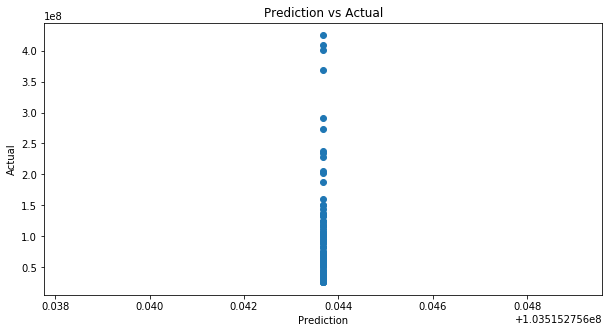

In [158]:
plt.figure(figsize=(10,5))
plt.scatter(pred, y)
plt.title('Prediction vs Actual')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [159]:
residuals = y - pred

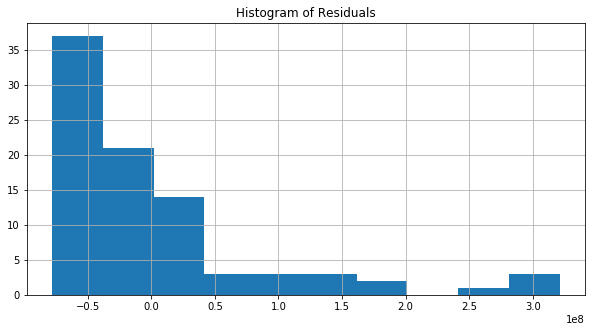

In [160]:
plt.figure(figsize=(10,5))
residuals.hist()
plt.title('Histogram of Residuals');

**Question 2:** Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [161]:
X2 = df[['ones', 'Budget']]

In [162]:
model2= LinearRegression()
model2.fit(X2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [163]:
model2.coef_

array([ 0.      ,  0.783055])

In [164]:
model2.intercept_

44430625.617948361

In [165]:
model2.score(X2,y)

0.28230037692954857

In [166]:
pred2 = model2.predict(X2)

Text(0,0.5,'Actual')

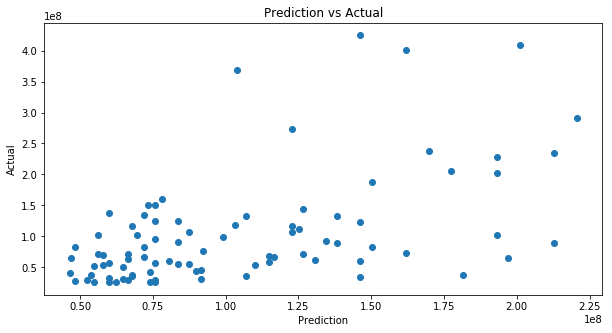

In [167]:
plt.figure(figsize=(10,5))
plt.scatter(pred2, y)
plt.title('Prediction vs Actual')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [168]:
res2 = y - pred2

Text(0,0.5,'Residuals')

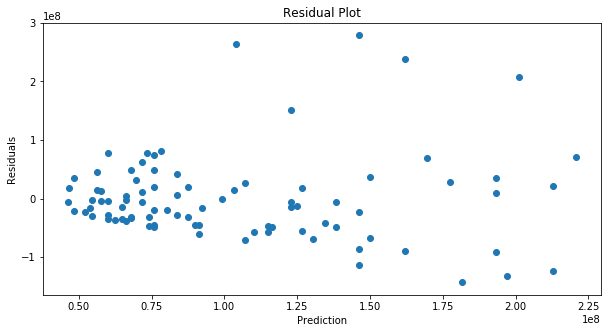

In [169]:
plt.figure(figsize=(10,5))
plt.scatter(pred2, res2)
plt.title('Residual Plot')
plt.xlabel('Prediction')
plt.ylabel('Residuals')

**Question 3:** Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [170]:
df_rating = pd.get_dummies(df['Rating'], drop_first = True)

In [171]:
X3 = X2.join(df_rating)

In [172]:
model3= LinearRegression()
model3.fit(X3,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [173]:
model3.coef_

array([  0.00000000e+00,   7.80596944e-01,  -1.71102537e+07,
        -1.38422899e+07])

In [174]:
model3.intercept_

57733402.919425517

In [175]:
model3.score(X3,y)

0.28690108404541181

In [176]:
pred3 = model3.predict(X3)

Text(0,0.5,'Actual')

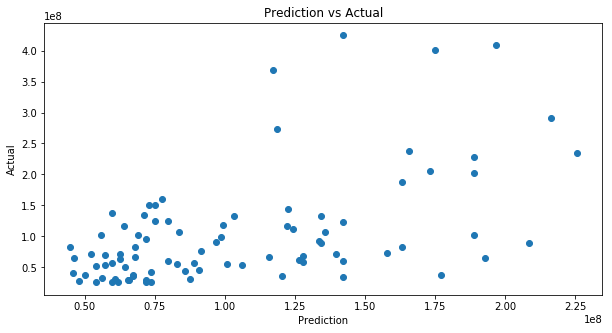

In [177]:
plt.figure(figsize=(10,5))
plt.scatter(pred3, y)
plt.title('Prediction vs Actual')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [178]:
res3 = y - pred3

Text(0,0.5,'Residuals')

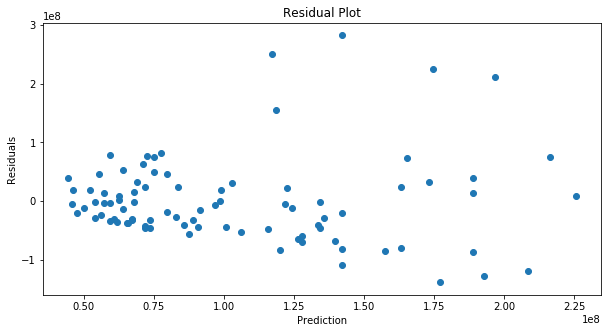

In [179]:
plt.figure(figsize=(10,5))
plt.scatter(pred3, res3)
plt.title('Residual Plot')
plt.xlabel('Prediction')
plt.ylabel('Residuals')

**Question 4:** Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [180]:
X4 = X3.join(df['Runtime'])

In [181]:
X4.head()

,ones,Budget,PG-13,R,Runtime
0,1.0,130000000.0,1,0,146
1,1.0,200000000.0,1,0,129
2,1.0,150000000.0,0,0,108
3,1.0,76000000.0,0,0,98
4,1.0,225000000.0,1,0,143


In [185]:
y_log = np.log(y)

In [186]:
model4= LinearRegression()
model4.fit(X4,y_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [187]:
model4.coef_

array([  0.00000000e+00,   5.80258923e-09,  -1.88174376e-01,
        -1.56205245e-01,   6.09106115e-03])

In [188]:
model4.intercept_

17.20732512489371

In [189]:
model4.score(X4,y_log)

0.31427950567927787

In [191]:
pred4 = model4.predict(X4)

In [192]:
res4 = y_log - pred4

Text(0,0.5,'Actual')

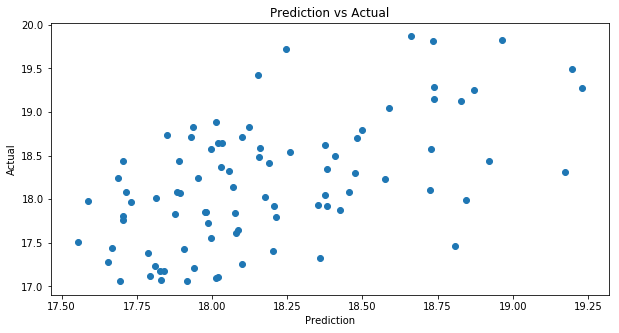

In [193]:
plt.figure(figsize=(10,5))
plt.scatter(pred4, y_log)
plt.title('Prediction vs Actual')
plt.xlabel('Prediction')
plt.ylabel('Actual')

Text(0,0.5,'Residuals')

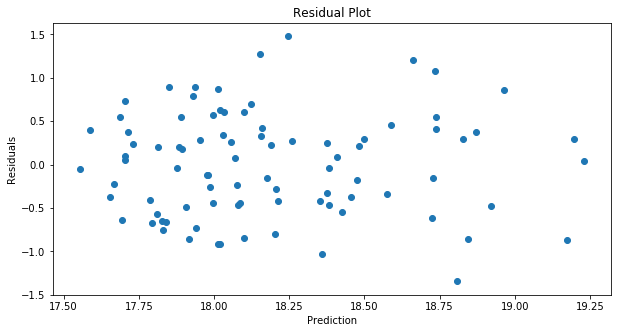

In [194]:
plt.figure(figsize=(10,5))
plt.scatter(pred4, res4)
plt.title('Residual Plot')
plt.xlabel('Prediction')
plt.ylabel('Residuals')

**Question 5:** Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X4, y_log, test_size=0.3)

In [206]:
model5= LinearRegression()
model5.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [207]:
model5.score(X_train,y_train)

0.26543690762127647

In [208]:
model5.score(X_test,y_test)

0.35557660405432134

In [209]:
pred5 = model5.predict(X_test)

Text(0,0.5,'Actual')

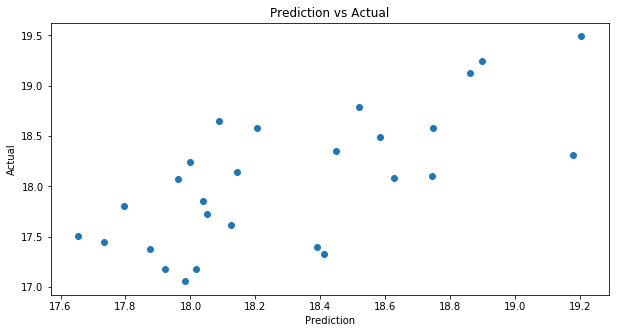

In [210]:
plt.figure(figsize=(10,5))
plt.scatter(pred5, y_test)
plt.title('Prediction vs Actual')
plt.xlabel('Prediction')
plt.ylabel('Actual')